# Setup Environment

In [ ]:
# Install dependencies if running in a fresh environment
!pip install ultralytics opencv-python supervision pyyaml


# Load Configurations

In [1]:
import yaml

# Load config.yaml
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

config


{'model_path': 'models/V6-1-1.pt',
 'space_sign': 'Space',
 'delete_sign': 'Delete',
 'confidence_threshold': 0.9,
 'default_hold_time': 0.7,
 'functional_hold_time': 1.0,
 'cooldown_time': 5.0,
 'max_detections': 1}

# Test Model Loading

In [4]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO(f'../{config['model_path']}')

# Verify model names (class labels)
model.names


{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'Delete',
 5: 'E',
 6: 'Enter',
 7: 'F',
 8: 'G',
 9: 'H',
 10: 'I',
 11: 'K',
 12: 'L',
 13: 'M',
 14: 'N',
 15: 'O',
 16: 'P',
 17: 'Q',
 18: 'R',
 19: 'S',
 20: 'Space',
 21: 'T',
 22: 'U',
 23: 'V',
 24: 'W',
 25: 'X',
 26: 'Y'}

# Test Model Inference on a Static Image


0: 640x480 1 N, 181.8ms
Speed: 2.8ms preprocess, 181.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


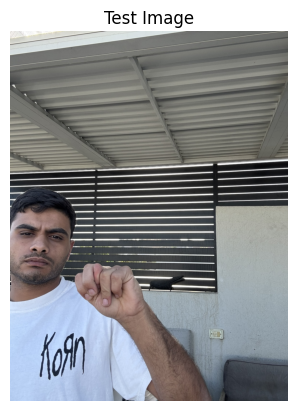

In [7]:
import cv2
from matplotlib import pyplot as plt

# Load a test image (make sure to place an image at ../data/sample_images/test_image.jpg)
image = cv2.imread("../data/image (2).jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run inference
results = model(image)

# Plot the image
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Test Image")
plt.show()


# Test Detection Conversion and Filtering

In [8]:
from supervision import Detections

# Convert results to Supervision detections
detections = Detections.from_ultralytics(results[0])

# Apply confidence threshold
mask = detections.confidence >= config["confidence_threshold"]
filtered_detections = detections[mask]

# Display filtered detections
filtered_detections


Detections(xyxy=array([[     344.02,        1278,      758.17,      1603.9]], dtype=float32), mask=None, confidence=array([    0.94618], dtype=float32), class_id=array([14]), tracker_id=None, data={'class_name': array(['N'], dtype='<U1')}, metadata={})

# Simulate Tracking with ByteTrack (Single Frame)

In [9]:
from supervision import ByteTrack

# Initialize tracker
tracker = ByteTrack()

# Update tracker with detections
tracked_detections = tracker.update_with_detections(filtered_detections)

# View tracked detections
tracked_detections


Detections(xyxy=array([[     344.02,        1278,      758.17,      1603.9]], dtype=float32), mask=None, confidence=array([    0.94618], dtype=float32), class_id=array([14]), tracker_id=array([1]), data={'class_name': array(['N'], dtype='<U1')}, metadata={})

# Visualize Tracked Detections

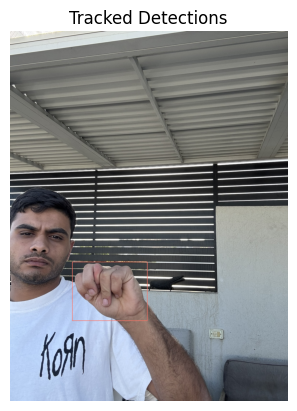

In [10]:
from supervision import BoxAnnotator

# Annotate bounding boxes
box_annotator = BoxAnnotator()
annotated_image = box_annotator.annotate(scene=image_rgb.copy(), detections=tracked_detections)

# Plot annotated image
plt.imshow(annotated_image)
plt.axis('off')
plt.title("Tracked Detections")
plt.show()
